## Astronomy example 1
### Downloading images and writing `FITS` files

For examples, documentation, tutorials, etc, see Astropy at http://www.astropy.org



In [2]:
import numpy as np

import urllib                  # For retrieving an image from a URL

import matplotlib as mpl
import matplotlib.pyplot as plt

from PIL import Image
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.visualization import astropy_mpl_style

In [3]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook 

# Following sets up LateX fonts
#mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#mpl.rc('text', usetex=True)
#import matplotlib.image as mpimg
   
plt.style.use(astropy_mpl_style)

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))    # Reduces overall size of figures
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', autolayout = True)  # Adjusts supblot parameters for new size


## Retrieve and display a JPG image

+ Download image from the web, and store it as a local file
+ "Open" the image
+ Determine the size
+ Display

<IPython.core.display.Javascript object>


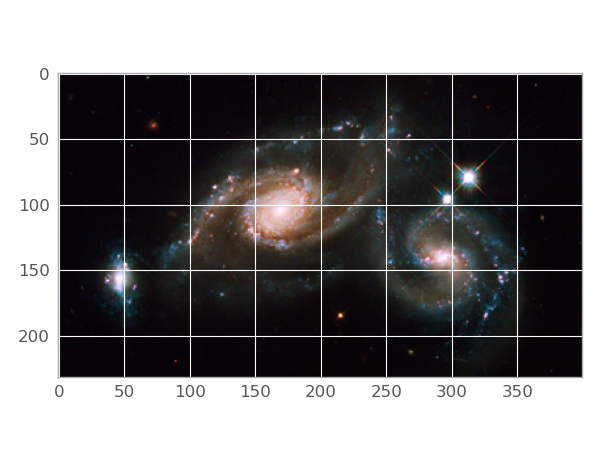

Image size: 400 x 232


In [4]:
urllib.request.urlretrieve('http://www.eg.bucknell.edu/~mligare/Hs-2009-14-a-web.jpg','Hs-2009-14-a-web.jpg')
image = Image.open('Hs-2009-14-a-web.jpg')
xsize, ysize = image.size

plt.figure()
print("Image size: {} x {}".format(xsize, ysize))
plt.grid(color = 'w')
plt.imshow(image);

## Separate colors

In [5]:
r, g, b = image.split()
r_data = np.array(r.getdata()) # data is now an array of length ysize*xsize
g_data = np.array(g.getdata())
b_data = np.array(b.getdata())
print(r_data.shape)


(92800,)


<IPython.core.display.Javascript object>


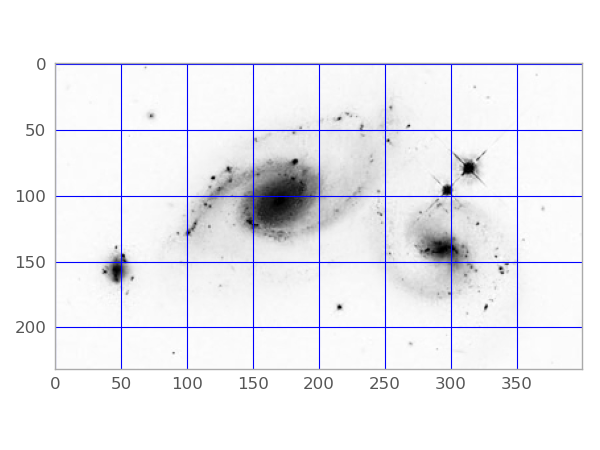

<IPython.core.display.Javascript object>


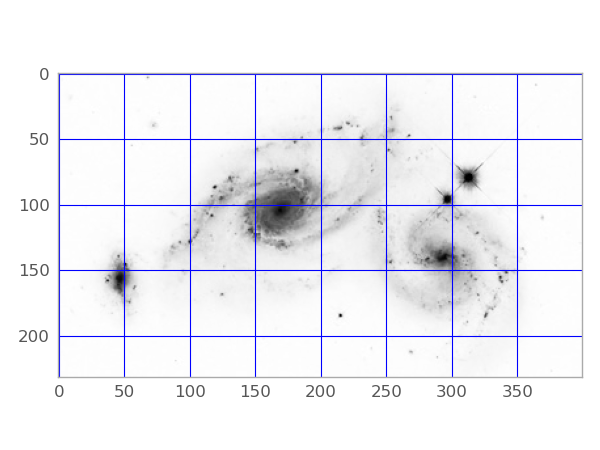

<IPython.core.display.Javascript object>


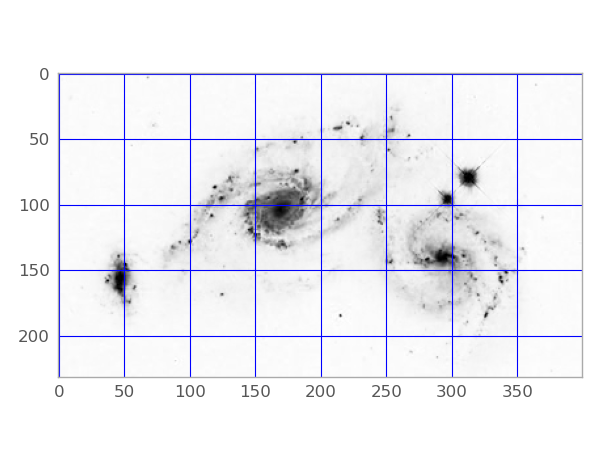

In [6]:
r_data = r_data.reshape(ysize, xsize)
g_data = g_data.reshape(ysize, xsize)
b_data = b_data.reshape(ysize, xsize)

plt.figure()
plt.grid(color = 'b')
plt.imshow(r_data, cmap='Greys');

plt.figure()
plt.grid(color = 'b')
plt.imshow(g_data, cmap='Greys');

plt.figure()
plt.grid(color = 'b')
plt.imshow(b_data, cmap='Greys');

### Write "FITS" files

In [8]:
red = fits.PrimaryHDU(data=r_data)
red.header['LATOBS'] = "32:11:56" # add spurious header info
red.header['LONGOBS'] = "110:56"
red.writeto('red.fits')

green = fits.PrimaryHDU(data=g_data)
green.header['LATOBS'] = "32:11:56"
green.header['LONGOBS'] = "110:56"
green.writeto('green.fits')

blue = fits.PrimaryHDU(data=b_data)
blue.header['LATOBS'] = "32:11:56"
blue.header['LONGOBS'] = "110:56"
blue.writeto('blue.fits')

### Version Information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [9]:
%load_ext version_information

In [10]:
%version_information numpy, matplotlib, astropy, PIL

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
numpy 1.18.5
matplotlib 3.3.0
astropy 4.0.1.post1
PIL 7.2.0
Fri Aug 07 15:33:55 2020 EDT